In [1]:
import pandas as pd

In [3]:
df=pd.read_csv(r'C:\Users\varsh\Downloads\stock sentiment analysis\Combined_News_DJIA.csv')

In [4]:
df.head()

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,2008-08-08,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",...,b'Georgia Invades South Ossetia - if Russia ge...,b'Al-Qaeda Faces Islamist Backlash',"b'Condoleezza Rice: ""The US would not act to p...",b'This is a busy day: The European Union has ...,"b""Georgia will withdraw 1,000 soldiers from Ir...",b'Why the Pentagon Thinks Attacking Iran is a ...,b'Caucasus in crisis: Georgia invades South Os...,b'Indian shoe manufactory - And again in a se...,b'Visitors Suffering from Mental Illnesses Ban...,"b""No Help for Mexico's Kidnapping Surge"""
1,2008-08-11,1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,b'An American citizen living in S.Ossetia blam...,...,b'Israel and the US behind the Georgian aggres...,"b'""Do not believe TV, neither Russian nor Geor...",b'Riots are still going on in Montreal (Canada...,b'China to overtake US as largest manufacturer',b'War in South Ossetia [PICS]',b'Israeli Physicians Group Condemns State Tort...,b' Russia has just beaten the United States ov...,b'Perhaps *the* question about the Georgia - R...,b'Russia is so much better at war',"b""So this is what it's come to: trading sex fo..."
2,2008-08-12,0,b'Remember that adorable 9-year-old who sang a...,"b""Russia 'ends Georgia operation'""","b'""If we had no sexual harassment we would hav...","b""Al-Qa'eda is losing support in Iraq because ...",b'Ceasefire in Georgia: Putin Outmaneuvers the...,b'Why Microsoft and Intel tried to kill the XO...,b'Stratfor: The Russo-Georgian War and the Bal...,"b""I'm Trying to Get a Sense of This Whole Geor...",...,b'U.S. troops still in Georgia (did you know t...,b'Why Russias response to Georgia was right',"b'Gorbachev accuses U.S. of making a ""serious ...","b'Russia, Georgia, and NATO: Cold War Two'",b'Remember that adorable 62-year-old who led y...,b'War in Georgia: The Israeli connection',b'All signs point to the US encouraging Georgi...,b'Christopher King argues that the US and NATO...,b'America: The New Mexico?',"b""BBC NEWS | Asia-Pacific | Extinction 'by man..."
3,2008-08-13,0,b' U.S. refuses Israel weapons to attack Iran:...,"b""When the president ordered to attack Tskhinv...",b' Israel clears troops who killed Reuters cam...,b'Britain\'s policy of being tough on drugs is...,b'Body of 14 year old found in trunk; Latest (...,b'China has moved 10 *million* quake survivors...,"b""Bush announces Operation Get All Up In Russi...",b'Russian forces sink Georgian ships ',...,b'Elephants extinct by 2020?',b'US humanitarian missions soon in Georgia - i...,"b""Georgia's DDOS came from US sources""","b'Russian convoy heads into Georgia, violating...",b'Israeli defence minister: US against strike ...,b'Gorbachev: We Had No Choice',b'Witness: Russian forces head towards Tbilisi...,b' Quarter of Russians blame U.S. for conflict...,b'Georgian president says US military will ta...,b'2006: Nobel laureate Aleksander Solzhenitsyn...
4,2008-08-14,1,b'All the experts admit that we should legalis...,b'War in South Osetia - 89 pictures made by a ...,b'Swedish wrestler Ara Abrahamian throws away ...,b'Russia exaggerated the death toll in South O...,b'Missile That Killed 9 Inside Pakistan May Ha...,"b""Rushdie Condemns Random House's Refusal to P...",b'Poland and US agree 

In [20]:
all_headlines = []

for i in range(len(df)):
    daily_headlines = ' '.join(str(headline) for headline in df.iloc[i, 2:])
    all_headlines.append(daily_headlines)
    
df['combined_headlines'] = all_headlines

In [21]:
print(f"Number of rows in the DataFrame is: {len(df)}")
print(f"Number of headlines we combined is: {len(all_headlines)}")

Number of rows in the DataFrame is: 1989
Number of headlines we combined is: 1989


In [22]:
import re

In [23]:
clean_headlines=[]

In [24]:
for headline in df['combined_headlines']:
    cleaned_headline=re.sub("[^a-zA-Z]","",headline).lower()
    


In [28]:
clean_headlines = []
for headline in df['combined_headlines']:

    cleaned_headline = re.sub("[^a-zA-Z]", " ", headline).lower()
    clean_headlines.append(cleaned_headline)
# Create our final, clean column
df['clean_headlines'] = clean_headlines


# --- Let's look at the result ---
# We'll display just the first 5 rows of our new 'clean_headlines' column to see our work
print("Success! Here is a sample of our newly created clean headlines:")
df['clean_headlines'].head()

Success! Here is a sample of our newly created clean headlines:


0    b georgia  downs two russian warplanes  as cou...
1    b why wont america and nato help us  if they w...
2    b remember that adorable   year old who sang a...
3    b  u s  refuses israel weapons to attack iran ...
4    b all the experts admit that we should legalis...
Name: clean_headlines, dtype: object

In [26]:
if df.empty:
    print(f"DataFrame is EMPTY. Please check that the file '{file_name}' is in the same folder as your notebook.")
else:
    print(f"Success! DataFrame loaded with {len(df)} rows.")
   df.head()

Success! DataFrame loaded with 1989 rows.


In [29]:
from sklearn.feature_extraction.text import CountVectorizer

In [30]:
countvector = CountVectorizer(ngram_range=(2,2))

In [31]:
traindataset = countvector.fit_transform(df['clean_headlines'])

In [32]:
print("The shape of our new numerical dataset is:")
print(traindataset.shape)

The shape of our new numerical dataset is:
(1989, 425898)


In [33]:
from sklearn.model_selection import train_test_split

In [41]:
X_train, X_test, y_train, y_test = train_test_split(
    traindataset,
    df['Label'],
    test_size=0.2,
    random_state=42
    )
    

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [43]:
logreg = LogisticRegression()

In [44]:
print("Training the model...")
logreg.fit(X_train, y_train)
print("Model training complete!")

Training the model...
Model training complete!


In [45]:
print("\nMaking predictions on the test data...")
predictions = logreg.predict(X_test)


Making predictions on the test data...


In [47]:
accuracy = accuracy_score(y_test, predictions)

In [48]:
print(f"\nFinal Accuracy Score: {accuracy * 100:.2f}%")



Final Accuracy Score: 54.27%


In [59]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

In [60]:
stopwords = set(STOPWORDS)

In [61]:
stopwords.add("say")
stopwords.add("will")
stopwords.add("us")
stopwords.add("new")
stopwords.add("one")
stopwords.add("two")
stopwords.add("said")

In [68]:
up_wordcloud = WordCloud(
    stopwords=stopwords,
    background_color='white',
    width=800,
    height=400,
    colormap='viridis',
    max_words=150
).generate(up_days)

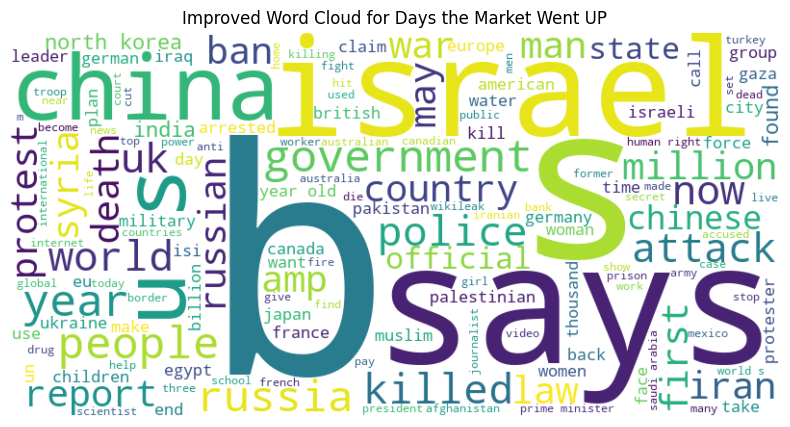

In [69]:
plt.figure(figsize=(10, 5))
plt.imshow(up_wordcloud, interpolation='bilinear')
plt.title('Improved Word Cloud for Days the Market Went UP')
plt.axis('off')
plt.show()

In [70]:
stopwords.add("says")
stopwords.add("us")
stopwords.add("people")
stopwords.add("government")
stopwords.add("israel")
stopwords.add("china")
stopwords.add("police")
stopwords.add("new") 

In [71]:
up_wordcloud = WordCloud(
    stopwords=stopwords,
    background_color='white',
    width=800,
    height=400,
    colormap='viridis',
    max_words=150
).generate(up_days)

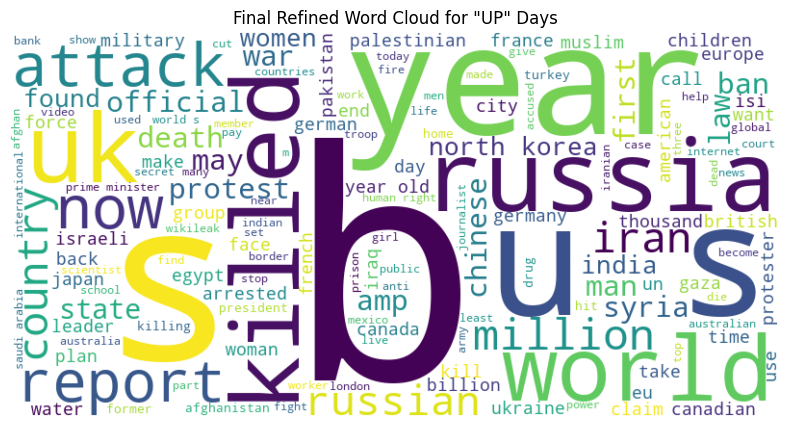

In [72]:
plt.figure(figsize=(10, 5))
plt.imshow(up_wordcloud, interpolation='bilinear')
plt.title('Final Refined Word Cloud for "UP" Days')
plt.axis('off')
plt.show()